# DSC540 Week5-6 Assignments

Logan Quandt

# Activity 7

In [16]:
from bs4 import BeautifulSoup
import pandas as pd
import bs4
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#open htm file with Beautiful soup, used utf-8 encoding to fix error when opening, found solution on stackoverflow
with open("List of countries by GDP (nominal) - Wikipedia.htm", 'r', encoding = 'utf-8') as file:
    soup = BeautifulSoup(file)
    file.close()

In [18]:
#find the number of tables using find_all
tables = soup.find_all('table')
print('Total Number of tables:', len(tables))

Total Number of tables: 9


In [19]:
#find the correct table for excercise
data_table = soup.find('table', {'class': '"wikitable"|}'})
type(data_table) #display table type

bs4.element.Tag

In [20]:
#separate sources from data
sources = data_table.tbody.findAll('tr', recursive = False)[0]

#get list of sources using for loop
sources_list = [td for td in sources.findAll('td')]
print('Total Number of Tables:', len(sources_list)) #print number of tables

Total Number of Tables: 3


In [21]:
#finding data from sources
data = data_table.tbody.findAll('tr', recursive= False)[1].findAll('td', recursive = False)

d_tables = []
for td in data:
    d_tables.append(td.findAll('table'))
print('Total Number of Data Tables:', len(d_tables)) #print number of data tables

Total Number of Data Tables: 3


In [22]:
#getting source names using findall parsed to 'a' and using getText()
sources_names = [s.findAll('a')[0].getText() for s in sources_list]
sources_names

['International Monetary Fund', 'World Bank', 'United Nations']

In [23]:
#find data frame for first source, separate header using strip extracting 'thead'
head1 = [th.getText().strip() for th in d_tables[0][0].findAll('thead')[0].findAll('th')]
head1

['Rank', 'Country', 'GDP(US$MM)']

In [24]:
#find rows through tbody using findAll
rows1 = d_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]
#finding data from the rows using strip() parsing td
data_rows1 = [[td.getText().strip() for td in tr.findAll('td')] for tr in rows1]

#create pandas dataframe for easy viewing
df_one = pd.DataFrame(data_rows1, columns = head1)
df_one

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"
...,...,...,...
186,186,Federated States of Micronesia,329
187,187,Palau,321
188,188,Marshall Islands,199
189,189,Kiribati,186


In [25]:
#repeat steps for other two sources

#find data frame for first source, separate header using strip extracting 'thead'
head2 = [th.getText().strip() for th in d_tables[1][0].findAll('thead')[0].findAll('th')]
head2

['Rank', 'Country', 'GDP(US$MM)']

In [26]:
#find rows through tbody using findAll
rows2 = d_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

#create function to remove unwanted '♠'
def text_strip(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find('♠')
        return td.text[index+1:].strip()

#finding data from the rows using strip() parsing td
data_rows2 = [[text_strip(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

#create pandas dataframe for easy viewing
df_two = pd.DataFrame(data_rows2, columns = head2)
df_two

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"
...,...,...,...
184,184,Palau,292
185,185,Marshall Islands,199
186,186,Kiribati,196
187,187,Nauru,114


In [27]:
#find data frame for first source, separate header using strip extracting 'thead'
head3 = [th.getText().strip() for th in d_tables[2][0].findAll('thead')[0].findAll('th')]
head3

['Rank', 'Country', 'GDP(US$MM)']

In [28]:
#find rows through tbody using findAll
rows3 = d_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

#finding data from the rows using text_strip function to ensure unwanted symbol is removed and parsing td
data_rows3 = [[text_strip(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows3]

#create pandas dataframe for easy viewing
df_three = pd.DataFrame(data_rows3, columns = head3)
df_three

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"
...,...,...,...
206,207,Marshall Islands,209
207,208,Nauru,182
208,209,Kiribati,180
209,210,Montserrat,63


# Activity 8

In [29]:
#read in csv file
visit_df = pd.read_csv('visit_data.csv')
visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [30]:
#check for duplicates using for loop
for columns in visit_df:
    if any(visit_df[columns].duplicated()):
        print('There are duplicates in', str(columns))
    else:
        print('There are no duplicates in', str(columns))

There are no duplicates in id
There are duplicates in first_name
There are duplicates in last_name
There are no duplicates in email
There are duplicates in gender
There are no duplicates in ip_address
There are duplicates in visit


In [31]:
#check if any columns contain NaN
visit_df.isna().sum()

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64

In [32]:
#remove outliers from visit column
before = visit_df.shape

visit_df = visit_df[np.isfinite(visit_df['visit'])]

after = visit_df.shape

print(before) 
print(after) #report difference of 26 records by printing shapes

(1000, 7)
(974, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x1336c128d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1336c145430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1336c128940>],
 'medians': [<matplotlib.lines.Line2D at 0x1336c145b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1336c145ee0>],
 'means': []}

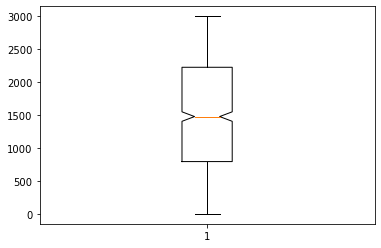

In [33]:
#plot boxplot to visualize outliers
plt.boxplot(visit_df['visit'], notch=True)

In [34]:
#remove outliers of 2800 and 200 based on boxplot, find count of remaining entries
visit_df2 = visit_df[(visit_df['visit'] <= 2800) & (visit_df['visit'] >= 200)]
len(visit_df2)

864

# SQL Lite Database 

In [35]:
import sqlite3

In [36]:
#creating query
query = """
CREATE TABLE contact_info_one
(Name VARCHAR(40), Address VARCHAR(40),
City VARCHAR(40), State VARCHAR(2),
Zip_code INTEGER(5), Phone_Number INTEGER(10));"""

In [45]:
#executing query
con = sqlite3.connect('mydata.sqlite')
con.execute(query)

In [38]:
#comitting the query
con.commit()

In [39]:
#creating random data to insert into table
data = [('John Doe', "2236 Layman Avenue", "Clinton", "NC", "28328", "9109346062"),
       ('Jane Doe', "3908 Winifred Way", "Richmond", "IN", "47374", "7657258263"),
       ("Logan Quandt", "4643 Star Trek Drive", "Destin", "FL", "32541", "8503512029"),
       ("Kayla Busch", "3168 Vine Street", "Schaumburg", "IL", "60173", "8476099730"),
       ("Jeff Doe", "2723 Pickens Way", "Tyler", "TX", "75757", "9033242737"),
       ("Bonnie Doe", "1657 Pearcy Avenue", "Oconomowoc", "WI", "53066", "2622002898"),
       ("Ryan Doe", "3998 Raver Croft Drive", "Johnson City", "TN", "37601", "4236473260"),
       ("Jason Quandt", "3091 Fairfax Drive", "New Brunswick", "NJ", "08901", "9089476129"),
       ("Jeffrey Busch", "3528 Thompson Street", "Gardena", "CA", "90248", "5626599609"),
       ("John Wayne", "121 Bombardier Way", "Saline", "MI", "48176", "7349446692")]

In [40]:
#create statement to insert data
stmt = 'INSERT INTO contact_info_one VALUES (?, ?, ?, ?, ?, ?)'

In [41]:
#execute insert statement
con.executemany(stmt, data)

In [42]:
#commit insert statement
con.commit()

In [43]:
#select and display rows
cursor = con.execute('SELECT * FROM contact_info_one')
rows = cursor.fetchall()
rows

[('John Doe', '2236 Layman Avenue', 'Clinton', 'NC', 28328, 9109346062),
 ('Jane Doe', '3908 Winifred Way', 'Richmond', 'IN', 47374, 7657258263),
 ('Logan Quandt', '4643 Star Trek Drive', 'Destin', 'FL', 32541, 8503512029),
 ('Kayla Busch', '3168 Vine Street', 'Schaumburg', 'IL', 60173, 8476099730),
 ('Jeff Doe', '2723 Pickens Way', 'Tyler', 'TX', 75757, 9033242737),
 ('Bonnie Doe', '1657 Pearcy Avenue', 'Oconomowoc', 'WI', 53066, 2622002898),
 ('Ryan Doe',
  '3998 Raver Croft Drive',
  'Johnson City',
  'TN',
  37601,
  4236473260),
 ('Jason Quandt',
  '3091 Fairfax Drive',
  'New Brunswick',
  'NJ',
  8901,
  9089476129),
 ('Jeffrey Busch', '3528 Thompson Street', 'Gardena', 'CA', 90248, 5626599609),
 ('John Wayne', '121 Bombardier Way', 'Saline', 'MI', 48176, 7349446692),
 ('John Doe', '2236 Layman Avenue', 'Clinton', 'NC', 28328, 9109346062),
 ('Jane Doe', '3908 Winifred Way', 'Richmond', 'IN', 47374, 7657258263),
 ('Logan Quandt', '4643 Star Trek Drive', 'Destin', 'FL', 32541, 850

In [44]:
#put the SQL table into a pandas dataframe
sql_df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
sql_df

,Name,Address,City,State,Zip_code,Phone_Number
0,John Doe,2236 Layman Avenue,Clinton,NC,28328,9109346062
1,Jane Doe,3908 Winifred Way,Richmond,IN,47374,7657258263
2,Logan Quandt,4643 Star Trek Drive,Destin,FL,32541,8503512029
3,Kayla Busch,3168 Vine Street,Schaumburg,IL,60173,8476099730
4,Jeff Doe,2723 Pickens Way,Tyler,TX,75757,9033242737
5,Bonnie Doe,1657 Pearcy Avenue,Oconomowoc,WI,53066,2622002898
6,Ryan Doe,3998 Raver Croft Drive,Johnson City,TN,37601,4236473260
7,Jason Quandt,3091 Fairfax Drive,New Brunswick,NJ,8901,9089476129
8,Jeffrey Busch,3528 Thompson Street,Gardena,CA,90248,5626599609
9,John Wayne,121 Bombardier Way,Saline,MI,48176,7349446692
